## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data pre-processing
### Step-2
#### Read dataset

In [2]:
step2_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step2-group-4.csv")
step2_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,14.03,-79.995422,-55.4,0.0,-1.517092,-3.082661,-24.599069,-3.443961,0.001526,0.001526,-3.443961
1,14.04,-79.995422,-55.4,0.0,-1.540122,-3.083672,-24.599069,-3.443961,0.001526,0.001526,-3.443961
2,14.05,-79.995422,-55.4,0.0,-1.517092,-3.084620,-24.599069,-3.443961,0.001526,0.001526,-3.443961
3,14.06,-79.995422,-55.4,0.0,-1.540122,-3.084620,-24.599069,-3.443961,0.001526,0.001526,-3.443961
4,14.07,-79.995422,-55.4,0.0,-1.517092,-3.084620,-24.599069,-3.443961,0.001526,0.001526,-3.443961


In [3]:
step2_raw.shape

(1035, 11)

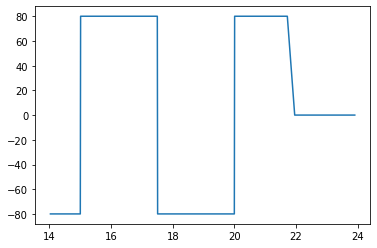

In [4]:
plt.plot(step2_raw.TimeStamp, step2_raw.Reference)

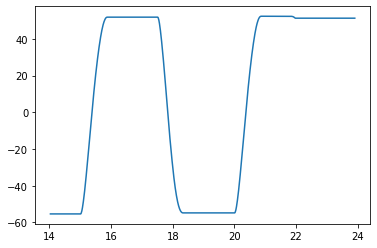

In [5]:
plt.plot(step2_raw.TimeStamp, step2_raw.Position)

#### Filtering

In [6]:
step2_raw[(step2_raw.Position<=0.5) & (step2_raw.Position>=0)]

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
141,15.38,79.998474,0.18,4.625,2.446923,9.886899,79.818418,11.177234,0.001526,0.001526,11.177234


In [7]:
#step2_fil=step2_raw.loc[141:, :]
step2_fil=step2_raw.loc[103:, :]
step2_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
103,15.01,79.998474,-55.40,0.000,-1.494063,12.390736,100.0,14.000153,0.001526,0.001526,14.000153
104,15.02,79.998474,-55.28,0.125,9.528607,12.374751,100.0,14.000153,0.001526,0.001526,14.000153
105,15.03,79.998474,-54.92,0.875,7.107593,12.386676,100.0,14.000153,0.001526,0.001526,14.000153
106,15.04,79.998474,-54.40,1.375,6.413818,12.394796,100.0,14.000153,0.001526,0.001526,14.000153
107,15.05,79.998474,-53.74,1.750,6.577906,12.382870,100.0,14.000153,0.001526,0.001526,14.000153


In [8]:
step2_fil=step2_fil.reset_index(drop=True)
step2_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,15.01,79.998474,-55.40,0.000,-1.494063,12.390736,100.0,14.000153,0.001526,0.001526,14.000153
1,15.02,79.998474,-55.28,0.125,9.528607,12.374751,100.0,14.000153,0.001526,0.001526,14.000153
2,15.03,79.998474,-54.92,0.875,7.107593,12.386676,100.0,14.000153,0.001526,0.001526,14.000153
3,15.04,79.998474,-54.40,1.375,6.413818,12.394796,100.0,14.000153,0.001526,0.001526,14.000153
4,15.05,79.998474,-53.74,1.750,6.577906,12.382870,100.0,14.000153,0.001526,0.001526,14.000153


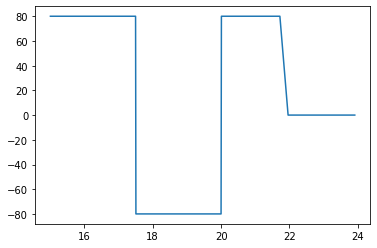

In [9]:
plt.plot(step2_fil.TimeStamp, step2_fil.Reference)

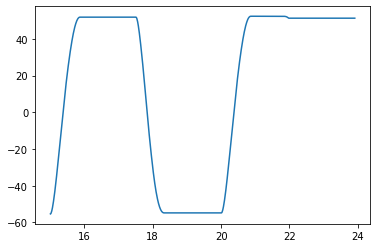

In [10]:
plt.plot(step2_fil.TimeStamp, step2_fil.Position)

#### Shifting

In [11]:
step2_fil["TimeShift"]=step2_fil.TimeStamp-step2_fil.TimeStamp[0]
step2_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
0,15.01,79.998474,-55.40,0.000,-1.494063,12.390736,100.0,14.000153,0.001526,0.001526,14.000153,0.00
1,15.02,79.998474,-55.28,0.125,9.528607,12.374751,100.0,14.000153,0.001526,0.001526,14.000153,0.01
2,15.03,79.998474,-54.92,0.875,7.107593,12.386676,100.0,14.000153,0.001526,0.001526,14.000153,0.02
3,15.04,79.998474,-54.40,1.375,6.413818,12.394796,100.0,14.000153,0.001526,0.001526,14.000153,0.03
4,15.05,79.998474,-53.74,1.750,6.577906,12.382870,100.0,14.000153,0.001526,0.001526,14.000153,0.04


In [12]:
step2_raw.Reference.max()

79.998474

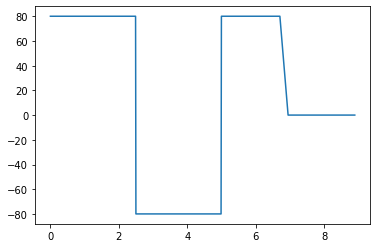

In [13]:
plt.plot(step2_fil.TimeShift, step2_fil.Reference)

#### Select one cycle (step-2)

In [14]:
freq=0.20
period=1/freq
step2_one_cycle=step2_fil[step2_fil.TimeShift<period+.01]
step2_one_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
519,19.97,-79.995422,-54.84,0.0,-1.563152,-3.131854,-25.157549,-3.520256,0.001526,0.001526,-3.520256,4.96
520,19.98,-79.995422,-54.84,0.0,-1.517092,-3.130828,-25.157549,-3.520256,0.001526,0.001526,-3.520256,4.97
521,19.99,-79.995422,-54.84,0.0,-1.517092,-3.132817,-25.157549,-3.520256,0.001526,0.001526,-3.520256,4.98
522,20.00,-79.995422,-54.84,0.0,-1.494063,-3.133844,-25.157549,-3.520256,0.001526,0.001526,-3.520256,4.99
523,20.01,79.998474,-54.84,0.0,-1.586182,12.382870,100.000000,14.000153,0.001526,0.001526,14.000153,5.00


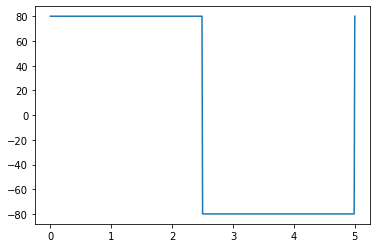

In [15]:
plt.plot(step2_one_cycle.TimeShift,step2_one_cycle.Reference)

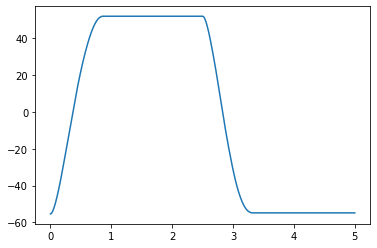

In [16]:
plt.plot(step2_one_cycle.TimeShift, step2_one_cycle.Position)

#### Select half cycle (step-2)

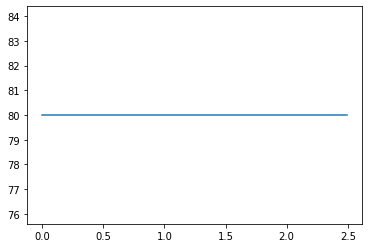

In [17]:
step2_half_cycle=step2_one_cycle[step2_one_cycle.TimeShift<=period/2]
plt.plot(step2_half_cycle.TimeShift,step2_half_cycle.Reference)

In [18]:
step2_half_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
256,17.46,79.998474,51.88,0.0,1.571788,3.472472,28.1178,3.938354,0.001526,0.001526,3.938354,2.45
257,17.47,79.998474,51.88,0.0,1.571788,3.467994,28.1178,3.938354,0.001526,0.001526,3.938354,2.46
258,17.48,79.998474,51.88,0.0,1.594818,3.473609,28.1178,3.938354,0.001526,0.001526,3.938354,2.47
259,17.49,79.998474,51.88,0.0,1.594818,3.470197,28.1178,3.938354,0.001526,0.001526,3.938354,2.48
260,17.50,79.998474,51.88,0.0,1.571788,3.471335,28.1178,3.938354,0.001526,0.001526,3.938354,2.49


In [19]:
step2_one_cycle.Position.min()

-55.4

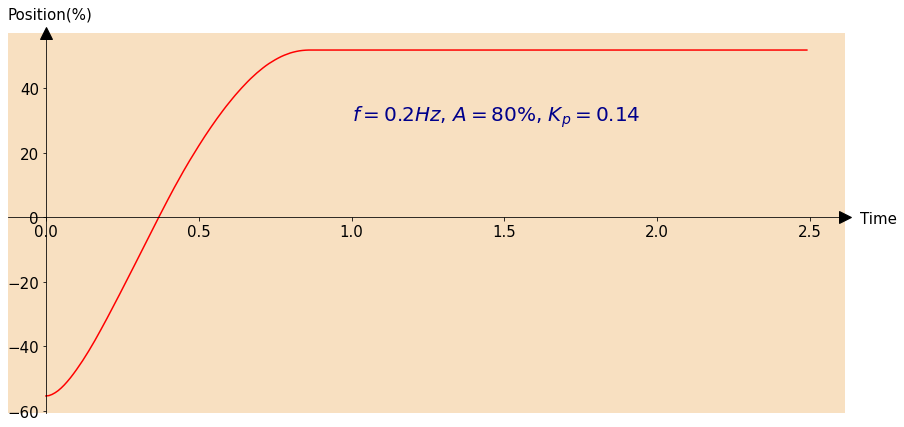

In [86]:
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step2_half_cycle.TimeShift, step2_half_cycle.Position, color="red", 
       linewidth=1.5)

step2_tex=r"$f=0.2 Hz$, $A=80\%$, $K_p=0.14$"
ax.text(1.0, 30, step2_tex, fontdict=font, color="DarkBlue", fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.05,1.03)
ax.xaxis.set_label_coords(1.04,0.53)
ax.tick_params(axis="both", which="major", labelsize=15)

In [4]:
step2_raw_g6=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step2-group-6.csv")
step2_raw_g6.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,60.90,0.001526,0.0,0.0,-0.224541,0.0,0.001526,0.001526,21.074235,0.001526,21.074235
1,60.91,0.001526,0.0,0.0,-0.244692,0.0,0.001526,0.001526,21.074235,0.001526,21.074235
2,60.92,0.001526,0.0,0.0,-0.224541,0.0,0.001526,0.001526,21.074235,0.001526,21.074235
3,60.93,0.001526,0.0,0.0,-0.236056,0.0,0.001526,0.001526,21.074235,0.001526,21.074235
4,60.94,0.001526,0.0,0.0,-0.250450,0.0,0.001526,0.001526,21.074235,0.001526,21.074235


In [6]:
step2_raw_g6.shape

(4200, 11)

In [8]:
remove_zero=step2_raw_g6.loc[203:,:]
remove_zero.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
203,0.01,0.001526,0.00,0.000,-0.256207,0.000000,0.001526,0.001526,0.001526,0.001526,0.001526
204,0.02,3.334096,0.00,0.000,-0.230299,0.446606,3.334096,0.465400,0.001526,0.001526,0.465400
205,0.03,6.666667,0.00,0.000,-0.118028,0.843320,6.666667,0.932326,0.001526,0.001526,0.932326
206,0.04,9.999237,0.02,0.125,0.005757,1.288962,9.980926,1.396201,0.001526,0.001526,1.396201
207,0.05,13.331807,0.02,0.000,0.074847,1.688251,13.313497,1.863127,0.001526,0.001526,1.863127


In [20]:
freq=0.2
period=1/freq
step2_g6_half_cycle=remove_zero[remove_zero.TimeStamp<=period/2]
step2_g6_half_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
448,2.46,79.998474,54.22,0.0,0.693775,3.279213,25.780117,3.608759,0.001526,0.001526,3.608759
449,2.47,79.998474,54.22,0.0,0.673624,3.278171,25.780117,3.608759,0.001526,0.001526,3.608759
450,2.48,79.998474,54.22,0.0,0.679381,3.278171,25.780117,3.608759,0.001526,0.001526,3.608759
451,2.49,79.998474,54.22,0.0,0.659230,3.280256,25.780117,3.608759,0.001526,0.001526,3.608759
452,2.50,79.998474,54.22,0.0,0.679381,3.277193,25.780117,3.608759,0.001526,0.001526,3.608759


In [21]:
step2_g6_half_cycle.reset_index(drop=True, inplace=True)

In [23]:
step2_g6_half_cycle.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,0.01,0.001526,0.00,0.000,-0.256207,0.000000,0.001526,0.001526,0.001526,0.001526,0.001526
1,0.02,3.334096,0.00,0.000,-0.230299,0.446606,3.334096,0.465400,0.001526,0.001526,0.465400
2,0.03,6.666667,0.00,0.000,-0.118028,0.843320,6.666667,0.932326,0.001526,0.001526,0.932326
3,0.04,9.999237,0.02,0.125,0.005757,1.288962,9.980926,1.396201,0.001526,0.001526,1.396201
4,0.05,13.331807,0.02,0.000,0.074847,1.688251,13.313497,1.863127,0.001526,0.001526,1.863127


In [25]:
step2_g6_half_cycle["TimeShift"]=step2_g6_half_cycle.TimeStamp-step2_g6_half_cycle.TimeStamp[0]

<ipython-input-25-41ba200cb1ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step2_g6_half_cycle["TimeShift"]=step2_g6_half_cycle.TimeStamp-step2_g6_half_cycle.TimeStamp[0]


In [26]:
step2_g6_half_cycle.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
0,0.01,0.001526,0.00,0.000,-0.256207,0.000000,0.001526,0.001526,0.001526,0.001526,0.001526,0.00
1,0.02,3.334096,0.00,0.000,-0.230299,0.446606,3.334096,0.465400,0.001526,0.001526,0.465400,0.01
2,0.03,6.666667,0.00,0.000,-0.118028,0.843320,6.666667,0.932326,0.001526,0.001526,0.932326,0.02
3,0.04,9.999237,0.02,0.125,0.005757,1.288962,9.980926,1.396201,0.001526,0.001526,1.396201,0.03
4,0.05,13.331807,0.02,0.000,0.074847,1.688251,13.313497,1.863127,0.001526,0.001526,1.863127,0.04


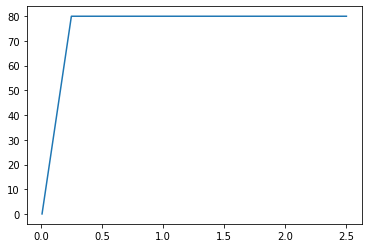

In [16]:
plt.plot(half_cycle.TimeStamp, half_cycle.Reference)

findfont: Font family ['JetBrains Mono'] not found. Falling back to DejaVu Sans.


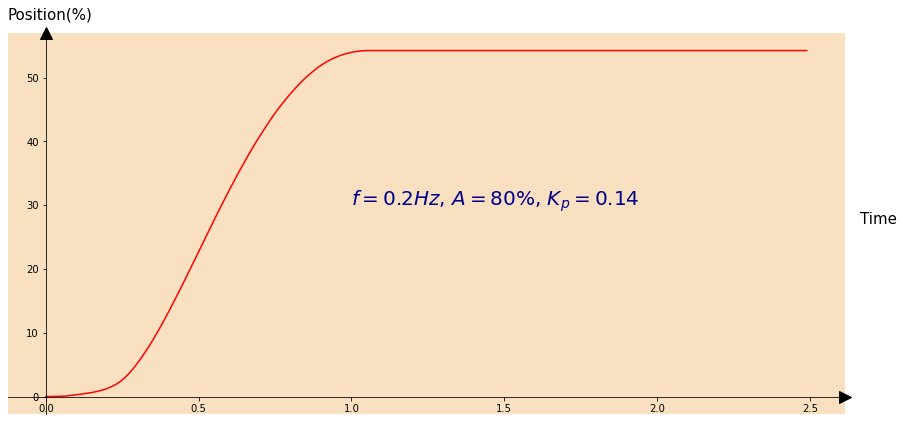

In [27]:
#plt.plot(half_cycle.TimeStamp, half_cycle.Position)
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step2_g6_half_cycle.TimeShift, step2_g6_half_cycle.Position, color="red", 
       linewidth=1.5)

step2_tex=r"$f=0.2 Hz$, $A=80\%$, $K_p=0.14$"
ax.text(1.0, 30, step2_tex, fontdict=font, color="DarkBlue", fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)

ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.05,1.03)
ax.xaxis.set_label_coords(1.04,0.53)

### Step-6
#### Read dataset

In [49]:
step6_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step6-group-6.csv")
step6_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,19.34,-14.998093,-15.04,0.0,-0.149694,0.049669,0.041199,0.080873,0.001526,0.001526,0.080873
1,19.35,-14.998093,-15.04,0.0,-0.149694,0.049654,0.041199,0.080873,0.001526,0.001526,0.080873
2,19.36,-14.998093,-15.04,0.0,-0.129543,0.049701,0.041199,0.080873,0.001526,0.001526,0.080873
3,19.37,-14.998093,-15.04,0.0,-0.164088,0.049654,0.041199,0.080873,0.001526,0.001526,0.080873
4,19.38,-14.998093,-15.04,0.0,-0.149694,0.049685,0.041199,0.080873,0.001526,0.001526,0.080873


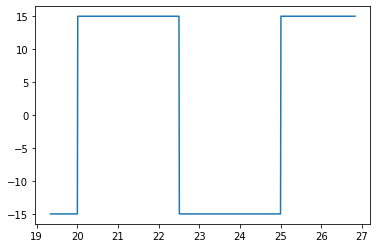

In [50]:
plt.plot(step6_raw.TimeStamp, step6_raw.Reference)

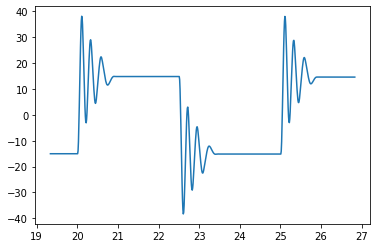

In [51]:
plt.plot(step6_raw.TimeStamp, step6_raw.Position)

#### Filtering

In [24]:
# step6_raw[(step6_raw.Position<=0.5) & (step6_raw.Position>=0)]

In [25]:
#step6_fil=step6_raw[(step6_raw.TimeStamp>=5) & (step6_raw.TimeStamp<=10)]
# step6_fil=step6_raw.loc[464:, :]
# step6_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
464,5.01,15.001144,-15.94,0.000,0.834833,54.902326,30.940719,61.879911,0.001526,0.001526,61.879911
465,5.02,15.001144,-14.80,2.250,93.089601,52.343668,29.799344,59.597162,0.001526,0.001526,59.597162
466,5.03,15.001144,-11.14,9.000,89.508456,45.941770,26.140230,52.278935,0.001526,0.001526,52.278935
467,5.04,15.001144,-5.04,15.375,57.833753,35.313947,20.039673,40.077821,0.001526,0.001526,40.077821
468,5.05,15.001144,2.60,19.750,25.329975,21.927943,12.401007,24.800488,0.001526,0.001526,24.800488


In [26]:
#plt.plot(step6_fil.TimeStamp, step6_fil.Reference)

In [27]:
#plt.plot(step6_fil.TimeStamp, step6_fil.Position)

In [28]:
#step6_raw[(step6_raw.Position<=0.5) & (step6_raw.Position>=0)]

In [29]:
# step6_fil_pos=step6_raw.loc[488:, :]
# step6_fil_pos.head()

In [30]:
#plt.plot(step6_fil_pos.TimeStamp, step6_fil_pos.Position)

In [31]:
#plt.plot(step6_raw.TimeStamp, step6_raw.Reference)

In [32]:
#plt.plot(step6_raw.TimeStamp, step6_raw.Position)

In [33]:
step6_fil.reset_index(drop=True, inplace=True)

In [34]:
step6_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,5.01,15.001144,-15.94,0.000,0.834833,54.902326,30.940719,61.879911,0.001526,0.001526,61.879911
1,5.02,15.001144,-14.80,2.250,93.089601,52.343668,29.799344,59.597162,0.001526,0.001526,59.597162
2,5.03,15.001144,-11.14,9.000,89.508456,45.941770,26.140230,52.278935,0.001526,0.001526,52.278935
3,5.04,15.001144,-5.04,15.375,57.833753,35.313947,20.039673,40.077821,0.001526,0.001526,40.077821
4,5.05,15.001144,2.60,19.750,25.329975,21.927943,12.401007,24.800488,0.001526,0.001526,24.800488


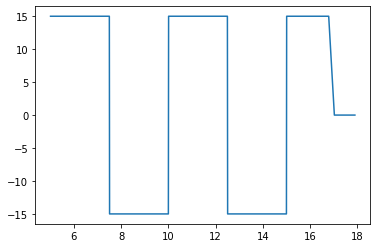

In [35]:
plt.plot(step6_fil.TimeStamp, step6_fil.Reference)

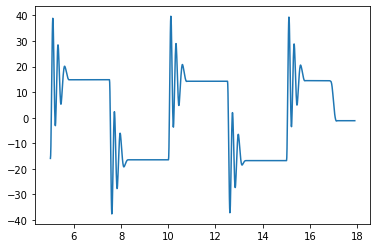

In [36]:
plt.plot(step6_fil.TimeStamp, step6_fil.Position)

#### Shifting

In [37]:
step6_fil["TimeShift"]=step6_fil.TimeStamp-step6_fil.TimeStamp[0]
step6_fil.head()

<ipython-input-37-eac0e9f7d199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step6_fil["TimeShift"]=step6_fil.TimeStamp-step6_fil.TimeStamp[0]


,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
0,5.01,15.001144,-15.94,0.000,0.834833,54.902326,30.940719,61.879911,0.001526,0.001526,61.879911,0.00
1,5.02,15.001144,-14.80,2.250,93.089601,52.343668,29.799344,59.597162,0.001526,0.001526,59.597162,0.01
2,5.03,15.001144,-11.14,9.000,89.508456,45.941770,26.140230,52.278935,0.001526,0.001526,52.278935,0.02
3,5.04,15.001144,-5.04,15.375,57.833753,35.313947,20.039673,40.077821,0.001526,0.001526,40.077821,0.03
4,5.05,15.001144,2.60,19.750,25.329975,21.927943,12.401007,24.800488,0.001526,0.001526,24.800488,0.04


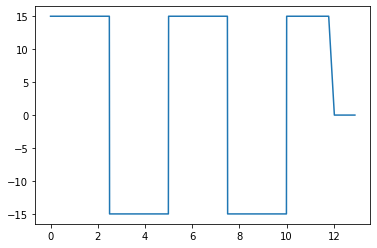

In [38]:
plt.plot(step6_fil.TimeShift, step6_fil.Reference)

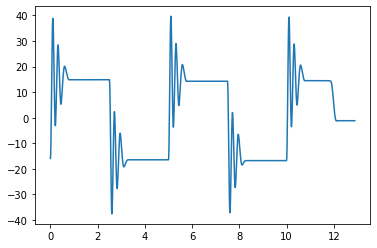

In [39]:
plt.plot(step6_fil.TimeShift, step6_fil.Position)

#### Select one cycle

In [40]:
freq=0.20
period=1/freq
step6_one_cycle=step6_fil[step6_fil.TimeShift<=period]
step6_one_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
519,9.97,-14.998093,-16.48,0.0,1.157251,2.606913,1.481651,2.961776,0.001526,0.001526,2.961776,4.96
520,9.98,-14.998093,-16.48,0.0,1.318460,2.601848,1.481651,2.961776,0.001526,0.001526,2.961776,4.97
521,9.99,-14.998093,-16.48,0.0,1.203311,2.602648,1.481651,2.961776,0.001526,0.001526,2.961776,4.98
522,10.00,-14.998093,-16.48,0.0,1.180281,2.603501,1.481651,2.961776,0.001526,0.001526,2.961776,4.99
523,10.01,15.001144,-16.48,0.0,1.295430,55.885510,31.480888,62.960250,0.001526,0.001526,62.960250,5.00


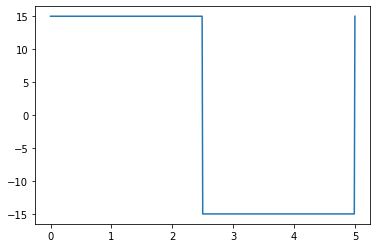

In [41]:
plt.plot(step6_one_cycle.TimeShift, step6_one_cycle.Reference)

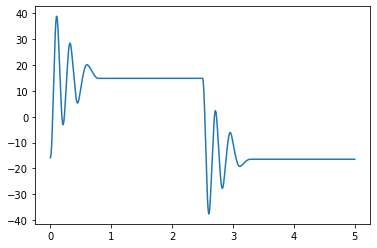

In [42]:
plt.plot(step6_one_cycle.TimeShift, step6_one_cycle.Position)

In [43]:
step6_raw.Position.max()

39.7

#### Select half cycle

In [52]:
#step6_half_cycle=step6_one_cycle[step6_one_cycle.TimeShift<=period/2]
step6_half_cycle=step6_raw[(step6_raw.TimeStamp>=20.24) & (step6_raw.TimeStamp<=22.29)]

In [53]:
step6_half_cycle.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
90,20.24,15.001144,0.94,8.000,24.739834,25.623320,14.064240,28.126955,0.001526,0.001526,28.126955
91,20.25,15.001144,4.62,10.250,14.451241,18.967998,10.383764,20.766003,0.001526,0.001526,20.766003
92,20.26,15.001144,8.78,11.125,3.932350,11.381494,6.224155,12.446784,0.001526,0.001526,12.446784
93,20.27,15.001144,13.02,11.000,0.840590,3.632775,1.985199,3.968872,0.001526,0.001526,3.968872
94,20.28,15.001144,17.18,10.500,-1.459518,-3.973540,-2.174411,-4.350347,0.001526,0.001526,-4.350347


In [54]:
step6_half_cycle.reset_index(drop=True, inplace=True)

In [56]:
step6_half_cycle.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,20.24,15.001144,0.94,8.000,24.739834,25.623320,14.064240,28.126955,0.001526,0.001526,28.126955
1,20.25,15.001144,4.62,10.250,14.451241,18.967998,10.383764,20.766003,0.001526,0.001526,20.766003
2,20.26,15.001144,8.78,11.125,3.932350,11.381494,6.224155,12.446784,0.001526,0.001526,12.446784
3,20.27,15.001144,13.02,11.000,0.840590,3.632775,1.985199,3.968872,0.001526,0.001526,3.968872
4,20.28,15.001144,17.18,10.500,-1.459518,-3.973540,-2.174411,-4.350347,0.001526,0.001526,-4.350347


In [57]:
step6_half_cycle["TimeShift"]=step6_half_cycle.TimeStamp-step6_half_cycle.TimeStamp[0]

<ipython-input-57-84b2b4c576be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step6_half_cycle["TimeShift"]=step6_half_cycle.TimeStamp-step6_half_cycle.TimeStamp[0]


In [58]:
step6_half_cycle.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
0,20.24,15.001144,0.94,8.000,24.739834,25.623320,14.064240,28.126955,0.001526,0.001526,28.126955,0.00
1,20.25,15.001144,4.62,10.250,14.451241,18.967998,10.383764,20.766003,0.001526,0.001526,20.766003,0.01
2,20.26,15.001144,8.78,11.125,3.932350,11.381494,6.224155,12.446784,0.001526,0.001526,12.446784,0.02
3,20.27,15.001144,13.02,11.000,0.840590,3.632775,1.985199,3.968872,0.001526,0.001526,3.968872,0.03
4,20.28,15.001144,17.18,10.500,-1.459518,-3.973540,-2.174411,-4.350347,0.001526,0.001526,-4.350347,0.04


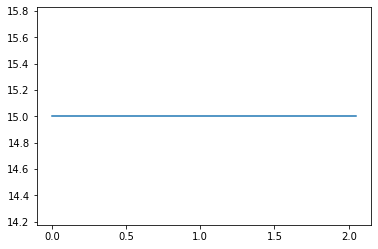

In [59]:
plt.plot(step6_half_cycle.TimeShift,step6_half_cycle.Reference)

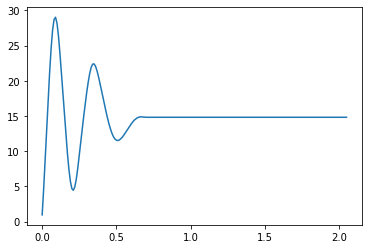

In [60]:
plt.plot(step6_half_cycle.TimeShift,step6_half_cycle.Position)

#### Second order system specification

In [61]:
c_max=step6_half_cycle.Position.max()
c_max

29.04

In [62]:
c_final=step6_half_cycle.Position[step6_half_cycle.Position.shape[0]-1]
c_final

14.82

In [63]:
#percentage of overshoot
os=((c_max-c_final)/c_final)*100
print("Percentage of overshoot, %0S=", os)

Percentage of overshoot, %0S= 95.95141700404858


In [75]:
zeta=-np.log(os/100)/np.sqrt(np.pi**2+(np.log(os/100))**2)
zeta=np.around(zeta, 4)
print(r"Damping ratio zeta =", zeta)

Damping ratio zeta = 0.0132


In [76]:
step6_half_cycle[step6_half_cycle.Position== c_max]

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
9,20.33,15.001144,29.04,0.125,-25.260885,-25.66318,-14.036774,-28.075074,0.001526,0.001526,-28.075074,0.09


In [78]:
t_p=0.09
w_n=np.pi/(t_p*np.sqrt(1-zeta**2))
w_n

34.90962649903892

In [80]:
t_s=4/(zeta*w_n)
t_s

8.680422376866323

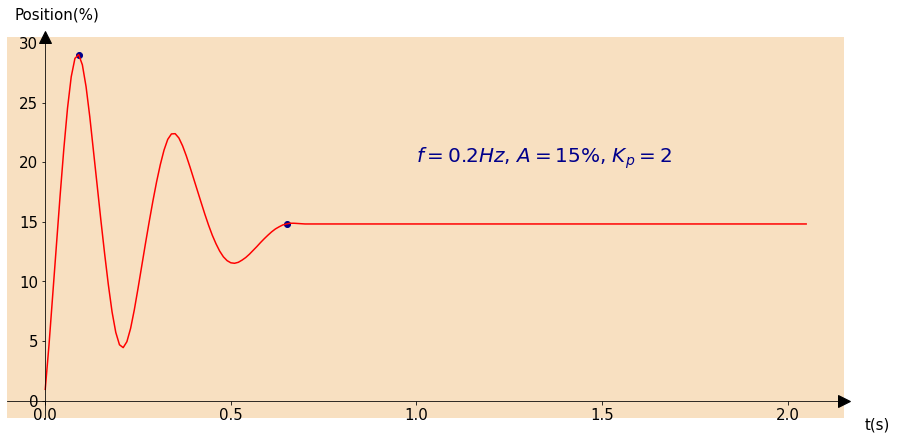

In [73]:
#plt.plot(step6_half_cycle.TimeShift,step6_half_cycle.Position)
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.set_facecolor("#F8E0C1")
ax.plot(step6_half_cycle.TimeShift, step6_half_cycle.Position, color="red", 
               linewidth=1.5)

step6_tex=r"$f=0.2 Hz$, $A=15\%$, $K_p=2$"
ax.text(1.0, 20, step6_tex, fontdict=font, color="DarkBlue", fontsize=20)

ax.scatter([0.09, 0.65], [c_max, c_final], color="DarkBlue")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="t(s)", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.06,1.04)
ax.xaxis.set_label_coords(1.04,0.0)
ax.tick_params(axis="both", which="major", labelsize=15)

In [ ]:
step6_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step7-group-4.csv")
step7_raw.head()

In [28]:
g6_step6_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step6-group-6.csv")
g6_step6_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,19.34,-14.998093,-15.04,0.0,-0.149694,0.049669,0.041199,0.080873,0.001526,0.001526,0.080873
1,19.35,-14.998093,-15.04,0.0,-0.149694,0.049654,0.041199,0.080873,0.001526,0.001526,0.080873
2,19.36,-14.998093,-15.04,0.0,-0.129543,0.049701,0.041199,0.080873,0.001526,0.001526,0.080873
3,19.37,-14.998093,-15.04,0.0,-0.164088,0.049654,0.041199,0.080873,0.001526,0.001526,0.080873
4,19.38,-14.998093,-15.04,0.0,-0.149694,0.049685,0.041199,0.080873,0.001526,0.001526,0.080873


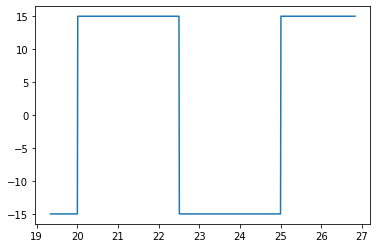

In [30]:
plt.plot(g6_step6_raw.TimeStamp, g6_step6_raw.Reference)

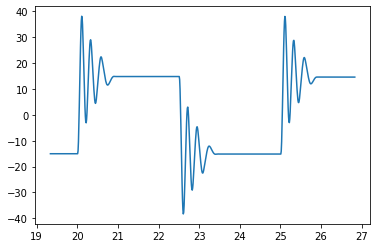

In [31]:
plt.plot(g6_step6_raw.TimeStamp, g6_step6_raw.Position)

In [43]:
step6g6_fil=g6_step6_raw[(g6_step6_raw.TimeStamp>=20.24) & (g6_step6_raw.TimeStamp<=22.29)]
step6g6_fil.head(10)

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
90,20.24,15.001144,0.94,8.000,24.739834,25.623320,14.064240,28.126955,0.001526,0.001526,28.126955
91,20.25,15.001144,4.62,10.250,14.451241,18.967998,10.383764,20.766003,0.001526,0.001526,20.766003
92,20.26,15.001144,8.78,11.125,3.932350,11.381494,6.224155,12.446784,0.001526,0.001526,12.446784
93,20.27,15.001144,13.02,11.000,0.840590,3.632775,1.985199,3.968872,0.001526,0.001526,3.968872
94,20.28,15.001144,17.18,10.500,-1.459518,-3.973540,-2.174411,-4.350347,0.001526,0.001526,-4.350347
95,20.29,15.001144,21.10,9.500,-5.581864,-11.119057,-6.095979,-12.193484,0.001526,0.001526,-12.193484
96,20.30,15.001144,24.54,7.875,-13.956099,-17.456087,-9.535363,-19.072251,0.001526,0.001526,-19.072251
97,20.31,15.001144,27.18,5.750,-21.429291,-22.245191,-12.175174,-24.351873,0.001526,0.001526,-24.351873
98,20.32,15.001144,28.72,3.000,-24.722562,-25.051562,-13.716335,-27.434195,0.001526,0.001526,-27.434195
99,20.33,15.001144,29.04,0.125,-25.260885,-25.663180,-14.036774,-28.075074,0.001526,0.001526,-28.075074


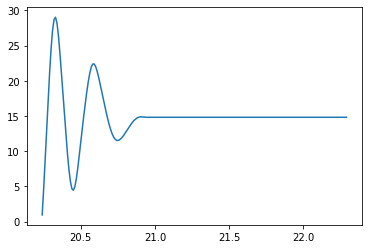

In [44]:
plt.plot(step6g6_fil.TimeStamp, step6g6_fil.Position)

In [45]:
c_final=step6g6_fil.Position[step6g6_fil.Position.shape[0]-1]
c_final

14.82

In [48]:
(step6g6_fil.Position.max()-c_final)/c_final

0.9595141700404858

### Step 7
#### Read dataset 

In [83]:
step7_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step7-group-4.csv")
step7_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,15.19,15.001144,-8.98,-4.125,93.602015,63.495797,23.979553,71.935607,0.001526,0.001526,71.935607
1,15.20,15.001144,-7.78,5.000,89.787693,60.150738,22.780194,68.337530,0.001526,0.001526,68.337530
2,15.21,15.001144,-3.78,13.625,88.299388,49.575310,18.779278,56.334783,0.001526,0.001526,56.334783
3,15.22,15.001144,2.70,21.250,56.394386,32.507665,12.300298,36.897841,0.001526,0.001526,36.897841
4,15.23,15.001144,10.64,25.250,14.304426,11.548605,4.359503,13.075456,0.001526,0.001526,13.075456


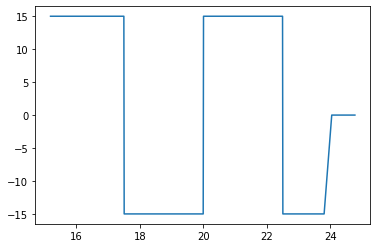

In [84]:
plt.plot(step7_raw.TimeStamp, step7_raw.Reference)

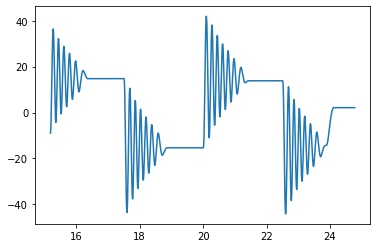

In [85]:
plt.plot(step7_raw.TimeStamp, step7_raw.Position)

In [86]:
step7_fil=step7_raw.loc[504:, :]
step7_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
504,20.01,15.001144,-15.38,0.000,0.466355,80.804956,30.379187,91.134508,0.001526,0.001526,91.134508
505,20.02,15.001144,-14.08,1.875,94.327456,76.778094,29.079118,87.234302,0.001526,0.001526,87.234302
506,20.03,15.001144,-9.96,9.500,94.327456,65.980060,24.959182,74.874495,0.001526,0.001526,74.874495
507,20.04,15.001144,-3.00,17.250,87.277438,47.440196,18.001068,54.000153,0.001526,0.001526,54.000153
508,20.05,15.001144,6.20,24.000,45.354444,23.314821,8.799878,26.396582,0.001526,0.001526,26.396582


In [56]:
step7_fil.reset_index(drop=True, inplace=True)

In [57]:
step7_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,20.01,15.001144,-15.38,0.000,0.466355,80.804956,30.379187,91.134508,0.001526,0.001526,91.134508
1,20.02,15.001144,-14.08,1.875,94.327456,76.778094,29.079118,87.234302,0.001526,0.001526,87.234302
2,20.03,15.001144,-9.96,9.500,94.327456,65.980060,24.959182,74.874495,0.001526,0.001526,74.874495
3,20.04,15.001144,-3.00,17.250,87.277438,47.440196,18.001068,54.000153,0.001526,0.001526,54.000153
4,20.05,15.001144,6.20,24.000,45.354444,23.314821,8.799878,26.396582,0.001526,0.001526,26.396582


In [58]:
step7_fil["TimeShift"]=step7_fil.TimeStamp-step7_fil.TimeStamp[0]

<ipython-input-58-42a1cdd1d119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step7_fil["TimeShift"]=step7_fil.TimeStamp-step7_fil.TimeStamp[0]


In [59]:
step7_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
0,20.01,15.001144,-15.38,0.000,0.466355,80.804956,30.379187,91.134508,0.001526,0.001526,91.134508,0.00
1,20.02,15.001144,-14.08,1.875,94.327456,76.778094,29.079118,87.234302,0.001526,0.001526,87.234302,0.01
2,20.03,15.001144,-9.96,9.500,94.327456,65.980060,24.959182,74.874495,0.001526,0.001526,74.874495,0.02
3,20.04,15.001144,-3.00,17.250,87.277438,47.440196,18.001068,54.000153,0.001526,0.001526,54.000153,0.03
4,20.05,15.001144,6.20,24.000,45.354444,23.314821,8.799878,26.396582,0.001526,0.001526,26.396582,0.04


In [60]:
step7_half_cycle=step7_fil[step7_fil.TimeShift<=period/2]
step7_half_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output,TimeShift
257,22.47,15.001144,13.82,0.0,1.456639,3.130828,1.179522,3.535515,0.001526,0.001526,3.535515,2.46
258,22.48,15.001144,13.82,0.0,1.594818,3.135897,1.179522,3.535515,0.001526,0.001526,3.535515,2.47
259,22.49,15.001144,13.82,0.0,1.479669,3.134871,1.179522,3.535515,0.001526,0.001526,3.535515,2.48
260,22.50,15.001144,13.82,0.0,1.571788,3.133844,1.179522,3.535515,0.001526,0.001526,3.535515,2.49
261,22.51,-14.998093,13.82,0.0,1.479669,-76.731986,-28.819715,-86.462196,0.001526,0.001526,-86.462196,2.50


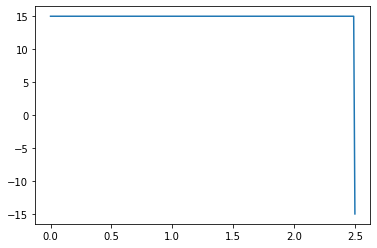

In [61]:
plt.plot(step7_half_cycle.TimeShift,step7_half_cycle.Reference)

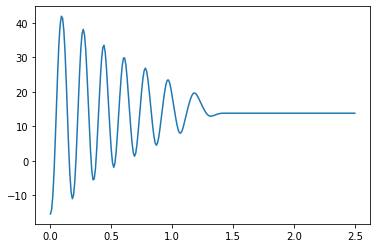

In [62]:
plt.plot(step7_half_cycle.TimeShift,step7_half_cycle.Position)

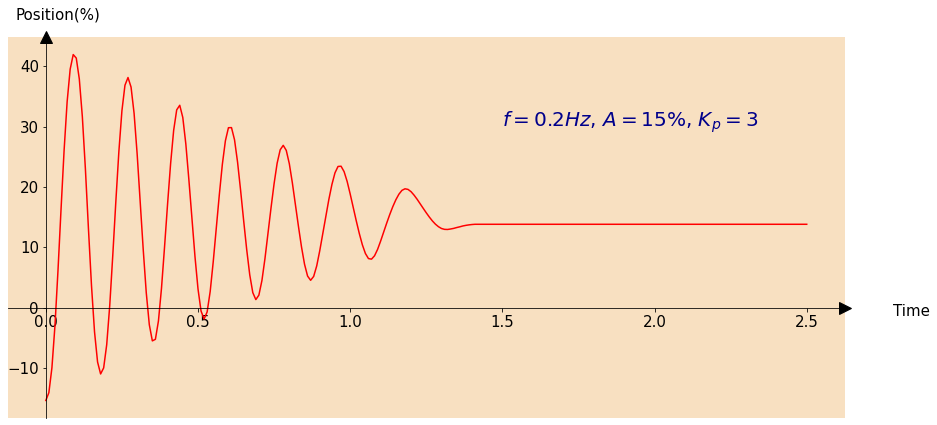

In [63]:
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step7_half_cycle.TimeShift, step7_half_cycle.Position, color="red", 
       linewidth=1.5)

step7_tex=r"$f=0.2 Hz$, $A=15\%$, $K_p=3$"
ax.text(1.5, 30, step7_tex, fontdict=font, color="DarkBlue", fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.06,1.04)
ax.xaxis.set_label_coords(1.08,0.3)
ax.tick_params(axis="both", which="major", labelsize=15)

### Step 11
#### Read dataset

In [87]:
step11_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step11-group-4.csv")
step11_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,1.21,9.999237,6.76,0.0,1.318460,2.844566,3.236439,3.236439,0.001526,0.001526,3.236439
1,1.22,9.999237,6.76,0.0,1.341490,2.846430,3.236439,3.236439,0.001526,0.001526,3.236439
2,1.23,9.999237,6.76,0.0,1.272400,2.846430,3.236439,3.236439,0.001526,0.001526,3.236439
3,1.24,9.999237,6.76,0.0,1.407701,2.846430,3.236439,3.236439,0.001526,0.001526,3.236439
4,1.25,9.999237,6.76,0.0,1.318460,2.845498,3.236439,3.236439,0.001526,0.001526,3.236439


In [88]:
step11_raw["TimeShift"]=step11_raw.TimeStamp-step11_raw.TimeStamp[0]

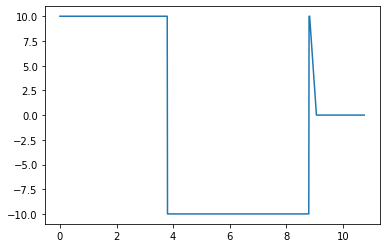

In [89]:
plt.plot(step11_raw.TimeShift, step11_raw.Reference)

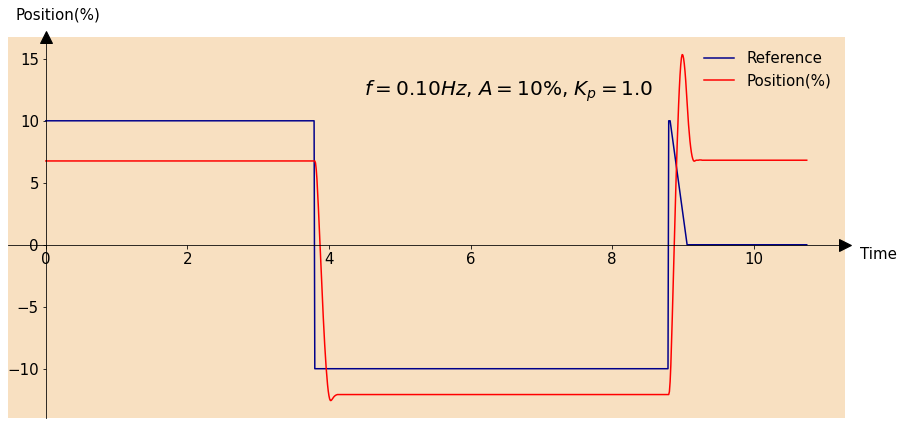

In [90]:
#plt.plot(step11_raw.TimeStamp, step11_raw.Position)
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step11_raw.TimeShift, step11_raw.Reference, color="DarkBlue", 
       linewidth=1.5, 
       label="Reference")
ax.plot(step11_raw.TimeShift, step11_raw.Position, color="red", 
       linewidth=1.5, 
       label="Position(%)")

step11_tex=r"$f=0.10 Hz$, $A=10\%$, $K_p=1.0$"
ax.text(4.5, 12, step11_tex, fontdict=font, fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.06,1.04)
ax.xaxis.set_label_coords(1.04,0.45)
ax.tick_params(axis="both", which="major", labelsize=15)
plt.legend(frameon=False, fontsize=15)

### Step 13
#### Read dataset

In [68]:
step13_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step13-group-3.csv")
step13_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta Err.,PID Output
0,1.95,9.999237,8.52,0.0,0.955739,2.263829,1.478599,2.586404,0.001526,0.001526,2.586404
1,1.96,9.999237,8.52,0.0,0.998920,2.265268,1.478599,2.586404,0.001526,0.001526,2.586404
2,1.97,9.999237,8.52,0.0,1.001799,2.263829,1.478599,2.586404,0.001526,0.001526,2.586404
3,1.98,9.999237,8.52,0.0,0.955739,2.263829,1.478599,2.586404,0.001526,0.001526,2.586404
4,1.99,9.999237,8.52,0.0,0.998920,2.263829,1.478599,2.586404,0.001526,0.001526,2.586404


In [69]:
step13_raw["TimeShift"]=step13_raw.TimeStamp-step13_raw.TimeStamp[0]

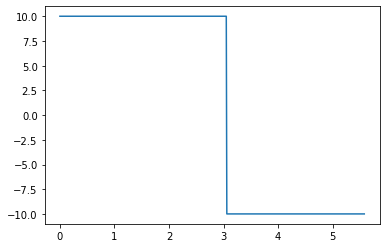

In [70]:
plt.plot(step13_raw.TimeShift, step13_raw.Reference)

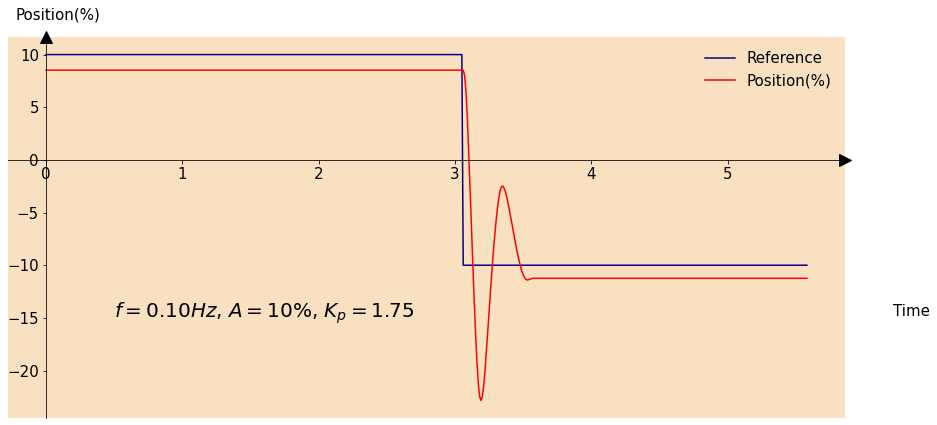

In [71]:
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step13_raw.TimeShift, step13_raw.Reference, color="DarkBlue", 
       linewidth=1.5, 
       label="Reference")
ax.plot(step13_raw.TimeShift, step13_raw.Position, color="red", 
       linewidth=1.5, 
       label="Position(%)")

step13_tex=r"$f=0.10 Hz$, $A=10\%$, $K_p=1.75$"
ax.text(0.5, -15, step13_tex, fontdict=font, fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.06,1.04)
ax.xaxis.set_label_coords(1.08,0.3)
ax.tick_params(axis="both", which="major", labelsize=15)
plt.legend(frameon=False, fontsize=15)

### Step 18
#### Read dataset

In [72]:
step18_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step18-group-2.csv")
step18_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output
0,2.67,-14.998093,-27.30,-6.500,5.458078,6.664147,12.303349,11.070420,-10.832380,7.020676,7.255665
1,2.68,-14.998093,-29.64,-5.750,7.907881,8.852374,14.641032,13.176165,-9.797818,6.312657,9.687953
2,2.69,-14.998093,-31.66,-4.875,12.505218,10.831341,16.661326,14.995041,-8.592355,5.455100,11.854734
3,2.70,-14.998093,-33.26,-3.625,14.655632,12.321892,18.260472,16.432441,-7.249561,4.316777,13.496605
4,2.71,-14.998093,-34.40,-2.375,16.031666,13.464649,19.401846,17.460899,-5.803006,3.080797,14.735637


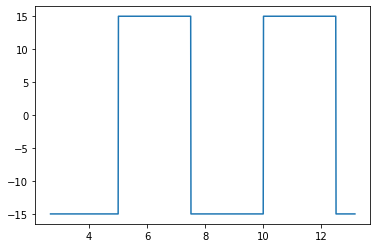

In [73]:
plt.plot(step18_raw.TimeStamp, step18_raw.Reference)

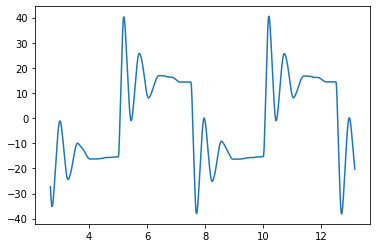

In [74]:
plt.plot(step18_raw.TimeStamp, step18_raw.Position)

In [75]:
step18_fil=step18_raw.loc[234:, :]
step18_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output
234,5.01,15.001144,-15.42,0.000,2.170565,28.925893,30.421912,27.379263,4.237430,0.001526,31.615167
235,5.02,15.001144,-14.92,1.250,53.060813,29.252417,29.921416,26.927596,6.556802,-1.347372,32.133974
236,5.03,15.001144,-13.30,4.375,45.596258,27.240438,28.300908,25.468833,8.796826,-4.371710,29.890898
237,5.04,15.001144,-10.58,7.375,33.986326,24.250124,25.581750,23.021286,10.869001,-7.338064,26.549172
238,5.05,15.001144,-7.12,9.500,21.466715,21.245341,22.121004,19.908446,12.703136,-9.340047,23.268482


In [76]:
step18_fil.reset_index(drop=True, inplace=True)

In [77]:
step18_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output
0,5.01,15.001144,-15.42,0.000,2.170565,28.925893,30.421912,27.379263,4.237430,0.001526,31.615167
1,5.02,15.001144,-14.92,1.250,53.060813,29.252417,29.921416,26.927596,6.556802,-1.347372,32.133974
2,5.03,15.001144,-13.30,4.375,45.596258,27.240438,28.300908,25.468833,8.796826,-4.371710,29.890898
3,5.04,15.001144,-10.58,7.375,33.986326,24.250124,25.581750,23.021286,10.869001,-7.338064,26.549172
4,5.05,15.001144,-7.12,9.500,21.466715,21.245341,22.121004,19.908446,12.703136,-9.340047,23.268482


In [78]:
step18_fil["TimeShift"]=step18_fil.TimeStamp-step18_fil.TimeStamp[0]

<ipython-input-78-9c7d65d61e31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step18_fil["TimeShift"]=step18_fil.TimeStamp-step18_fil.TimeStamp[0]


In [79]:
step18_fil.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output,TimeShift
0,5.01,15.001144,-15.42,0.000,2.170565,28.925893,30.421912,27.379263,4.237430,0.001526,31.615167,0.00
1,5.02,15.001144,-14.92,1.250,53.060813,29.252417,29.921416,26.927596,6.556802,-1.347372,32.133974,0.01
2,5.03,15.001144,-13.30,4.375,45.596258,27.240438,28.300908,25.468833,8.796826,-4.371710,29.890898,0.02
3,5.04,15.001144,-10.58,7.375,33.986326,24.250124,25.581750,23.021286,10.869001,-7.338064,26.549172,0.03
4,5.05,15.001144,-7.12,9.500,21.466715,21.245341,22.121004,19.908446,12.703136,-9.340047,23.268482,0.04


In [80]:
step18_half_cycle=step18_fil[step18_fil.TimeShift<=period/2]
step18_half_cycle.tail()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output,TimeShift
246,7.47,15.001144,14.36,0.0,-0.002879,-0.397480,0.645457,0.578317,-0.999466,0.001526,-0.422675,2.46
247,7.48,15.001144,14.36,0.0,0.017272,-0.347795,0.645457,0.578317,-0.950637,0.001526,-0.373846,2.47
248,7.49,15.001144,14.36,0.0,0.077726,-0.298110,0.645457,0.578317,-0.898756,0.001526,-0.321965,2.48
249,7.50,15.001144,14.36,0.0,0.118028,-0.248425,0.645457,0.578317,-0.849928,0.001526,-0.273136,2.49
250,7.51,-14.998093,14.36,0.0,0.077726,-25.935596,-29.353780,-26.417945,-1.954681,0.001526,-28.374151,2.50


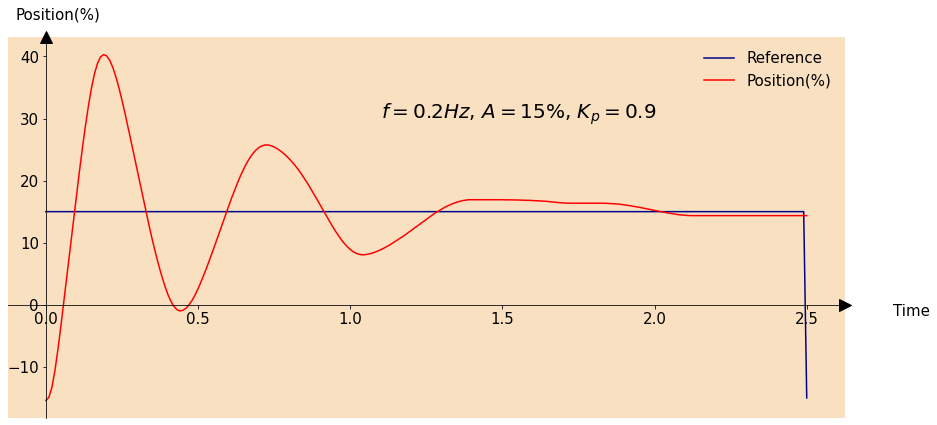

In [81]:
font = {'family': 'JetBrains Mono',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(step18_half_cycle.TimeShift, step18_half_cycle.Reference, color="DarkBlue", 
        linewidth=1.5, 
        label="Reference")
ax.plot(step18_half_cycle.TimeShift, step18_half_cycle.Position, color="red", 
        linewidth=1.5, 
        label="Position(%)")

step18_tex=r"$f=0.2 Hz$, $A=15\%$, $K_p=0.9$"
ax.text(1.1, 30, step18_tex, fontdict=font, fontsize=20)

ax.set_facecolor("#F8E0C1")
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", ms=12, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", ms=12, transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel(xlabel="Time", fontsize=15)
ax.set_ylabel(ylabel="Position(%)", rotation="horizontal", fontsize=15)
ax.yaxis.set_label_coords(0.06,1.04)
ax.xaxis.set_label_coords(1.08,0.3)
ax.tick_params(axis="both", which="major", labelsize=15)
plt.legend(frameon=False, fontsize=15)

### Step 27
#### Read dataset

In [100]:
step27_raw=pd.read_csv("D:\Extra Knowledge\HP-NPC\dataset/exp6-step27-group-4.csv")
step27_raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output
0,223.23,0.001526,0.0,0.0,0.028787,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
1,223.24,0.001526,0.0,0.0,-0.017272,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
2,223.25,0.001526,0.0,0.0,-0.040302,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
3,223.26,0.001526,0.0,0.0,-0.040302,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
4,223.27,0.001526,0.0,0.0,-0.017272,0.0,0.001526,0.001526,0.001526,0.001526,0.001526


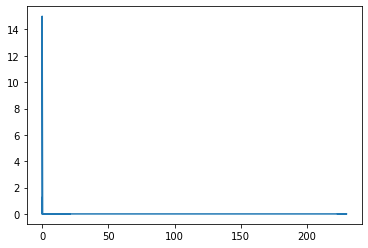

In [101]:
plt.plot(step27_raw.TimeStamp, step27_raw.Reference)

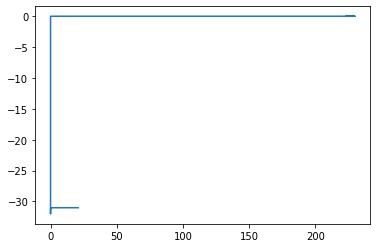

In [102]:
plt.plot(step27_raw.TimeStamp, step27_raw.Position)